In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score


In [2]:
data = pd.read_csv('train_bm.csv')

In [3]:
data.shape

(8523, 12)

In [4]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
data['Item_Weight'].fillna(data['Item_Weight'].median(),inplace = True)

In [8]:
data['Item_Type']=data['Item_Type'].astype('category')

In [9]:
data['Outlet_Size']=data['Outlet_Size'].astype('category')

In [10]:
data['Item_Fat_Content']=data['Item_Fat_Content'].astype('category')

In [11]:
data['Outlet_Location_Type']=data['Outlet_Location_Type'].astype('category')

In [12]:
data['Outlet_Type']=data['Outlet_Type'].astype('category')

In [13]:
data['Outlet_Establishment_Year']=data['Outlet_Establishment_Year'].astype('category')

In [14]:
data = data.drop(['Item_Identifier','Outlet_Identifier'],axis=1)
data.shape

(8523, 10)

In [15]:
data = pd.get_dummies(data)

In [16]:
data.dtypes

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Item_Outlet_Sales                  float64
Item_Fat_Content_LF                  uint8
Item_Fat_Content_Low Fat             uint8
Item_Fat_Content_Regular             uint8
Item_Fat_Content_low fat             uint8
Item_Fat_Content_reg                 uint8
Item_Type_Baking Goods               uint8
Item_Type_Breads                     uint8
Item_Type_Breakfast                  uint8
Item_Type_Canned                     uint8
Item_Type_Dairy                      uint8
Item_Type_Frozen Foods               uint8
Item_Type_Fruits and Vegetables      uint8
Item_Type_Hard Drinks                uint8
Item_Type_Health and Hygiene         uint8
Item_Type_Household                  uint8
Item_Type_Meat                       uint8
Item_Type_Others                     uint8
Item_Type_Seafood                    uint8
Item_Type_Snack Foods                uint8
Item_Type_S

In [17]:
x=data.drop(['Item_Outlet_Sales'], axis=1)
y=data['Item_Outlet_Sales']
x.shape, y.shape

((8523, 43), (8523,))

In [18]:
#importing Train_test_split
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

In [19]:
#creating instance of linear regression
lr = LR(normalize = True)

In [20]:
#Fitting the model
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [21]:
#Predicting over the train set and calculating error
train_predict = lr.predict(train_x)
k = mse(train_predict, train_y)
print('Training Mean Error', k)

Training Mean Error 1218365.217938362


In [22]:
#Predicting over the test set and calculating error
test_predict = lr.predict(test_x)
k = mse(test_predict, test_y)
print('Test Mean Error', k)

Test Mean Error 1431953.125994855


In [23]:
#Parameters of Linear Regression
lr.coef_

array([ 1.84223880e-01, -3.85721051e+02,  1.54977670e+01,  1.96427091e+14,
        1.96427091e+14,  1.96427091e+14,  1.96427091e+14,  1.96427091e+14,
        1.22956275e+14,  1.22956275e+14,  1.22956275e+14,  1.22956275e+14,
        1.22956275e+14,  1.22956275e+14,  1.22956275e+14,  1.22956275e+14,
        1.22956275e+14,  1.22956275e+14,  1.22956275e+14,  1.22956275e+14,
        1.22956275e+14,  1.22956275e+14,  1.22956275e+14,  1.22956275e+14,
        8.09344040e+13,  1.55680002e+14, -2.42473258e+14,  5.08934693e+14,
        1.69291315e+14,  6.26736775e+13, -5.76256848e+13,  6.26736775e+13,
        1.29326625e+14,  2.98470291e+13, -2.91465210e+14,  1.20299362e+14,
        7.30869579e+13, -1.11760615e+14, -2.34613969e+14, -5.31188649e+14,
       -2.07780987e+14,  1.39884630e+14,  1.88276851e+14])

Text(0.5, 1.0, 'Normalized Coefficient plot')

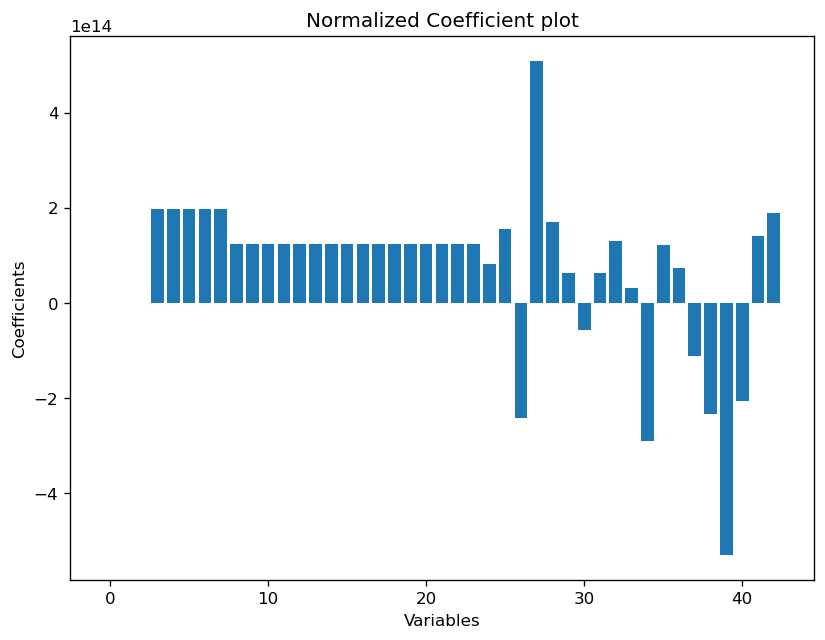

In [24]:
#Plotting the coefficients
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b') 
x = range(len(train_x.columns)) 
y = lr.coef_ 
plt.bar( x, y ) 
plt.xlabel( "Variables") 
plt.ylabel('Coefficients') 
plt.title('Normalized Coefficient plot')

In [25]:
#Creating a new subset of data
x = data.drop(['Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']
x.shape, y.shape

((8523, 43), (8523,))

In [26]:
#Arranging coefficients with features
Coefficients = pd.DataFrame({
    'Variable' : x.columns,
    'coefficient' : lr.coef_
})

In [27]:
Coefficients

,Variable,coefficient
0,Item_Weight,1.842239e-01
1,Item_Visibility,-3.857211e+02
2,Item_MRP,1.549777e+01
3,Item_Fat_Content_LF,1.964271e+14
4,Item_Fat_Content_Low Fat,1.964271e+14
5,Item_Fat_Content_Regular,1.964271e+14
6,Item_Fat_Content_low fat,1.964271e+14
7,Item_Fat_Content_reg,1.964271e+14
8,Item_Type_Baking Goods,1.229563e+14
9,Item_Type_Breads,1.229563e+14


In [28]:
#Choosing variables with the significance greater than 0 (Filtering Significant feature)
sig_var = Coefficients[Coefficients.coefficient > 0]

In [29]:
#Extracting the significant subset do implement variables
subset = data[sig_var['Variable'].values]
subset.head()

,Item_Weight,Item_MRP,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,...,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009,Outlet_Size_High,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,249.8092,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,5.92,48.2692,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,141.6180,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,19.20,182.0950,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,8.93,53.8614,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset,y,random_state = 56)

Implementing Final Linear Regression

In [31]:
#Creating instance of Linear Regression with Normalized Data
lr = LR(normalize = True)

#Fitting the data
lr.fit(train_x, train_y)

LinearRegression(normalize=True)

In [32]:
#Predicting over the train set and Calculating the error
train_predict = lr.predict(train_x)
lintrain = mae(train_predict, train_y)
print('Training mean error',lintrain)

Training mean error 821.5101056320401


In [33]:
#Predicting over the test set and Calculating the error (mae)
test_predict = lr.predict(test_x)
lintest = mae(test_predict, test_y)
print('Training mean error',lintest)

Training mean error 875.0689077428437


Text(0.5, 1.0, 'Normalized Coefficient plot')

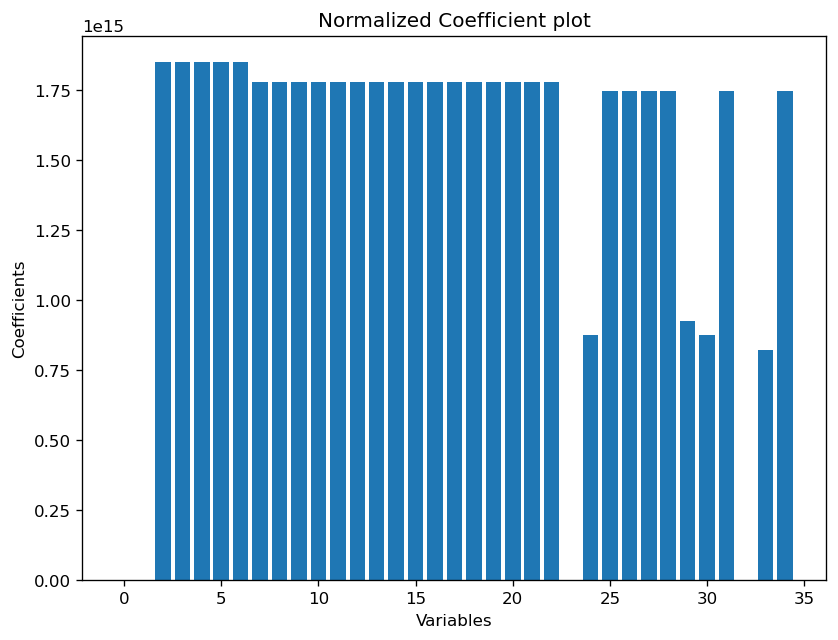

In [34]:
#Plotting the coefficients
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b') 
x = range(len(train_x.columns)) 
y = lr.coef_ 
plt.bar( x, y ) 
plt.xlabel( "Variables") 
plt.ylabel('Coefficients') 
plt.title('Normalized Coefficient plot')

In [35]:
test_predict = lr.predict(test_x)
test_predict[:10], lr.fit(train_x, train_y).score(test_x, test_y)

(array([ 933., 2520., 3033., 3049., 1438., 2455.,   43., 3696., 2825.,
        4209.]),
 0.5406450349673279)